In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
MIN_MATCH_COUNT = 10

In [3]:
imageNames = glob.glob('undis1/*.jpg')
#imageNames = glob.glob('undis2/*.jpg')
images = [cv2.imread(imageName, 0) for imageName in imageNames]

In [4]:
imageNames

['undis1\\p1.JPG',
 'undis1\\p2.JPG',
 'undis1\\p3.JPG',
 'undis1\\p4.JPG',
 'undis1\\p5.JPG']

## Step by Step homography

In [5]:
tempCompare = [images[2], images[1]] 

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

In [7]:
kp1, des1 = sift.detectAndCompute(tempCompare[0], None)
kp2, des2 = sift.detectAndCompute(tempCompare[1], None)

In [8]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

In [9]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [10]:
matches = flann.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [11]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = tempCompare[0].shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    tempCompare[1] = cv2.polylines(tempCompare[1],[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

In [12]:
print(M)

[[  8.90829468e-01  -6.36590848e-02   2.07790358e+03]
 [  3.91851439e-02   9.30890243e-01   3.05587289e+02]
 [  2.04349189e-06  -2.01642939e-05   1.00000000e+00]]


In [13]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)

In [14]:
img3 = cv2.drawMatches(tempCompare[0],kp1,tempCompare[1],kp2,good,None,**draw_params)

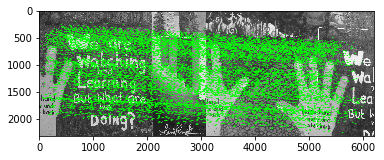

(<matplotlib.image.AxesImage at 0x24086c539e8>, None)

In [15]:
plt.imshow(img3, 'gray'),plt.show()

In [17]:
cv2.imwrite('match\\match_1_2.jpg',img3)

True

## for-loop get four homographies

In [16]:
H = [] # save result in to H

homography bewteen 1 and 2:
[[  8.63545462e-01   1.74127290e-02   1.91503461e+03]
 [  3.87112731e-02   9.08889209e-01   1.22118079e+02]
 [  1.16591937e-05   6.36985439e-07   1.00000000e+00]]


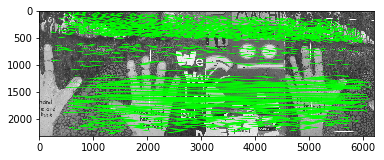

homography bewteen 2 and 3:
[[  8.86447186e-01  -6.45127959e-02   2.07802812e+03]
 [  3.61292903e-02   9.29398902e-01   3.06793156e+02]
 [  4.37483770e-07  -2.05032592e-05   1.00000000e+00]]


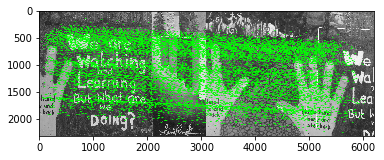

homography bewteen 3 and 4:
[[  1.01384519e+00  -2.59172802e-03   1.40576118e+03]
 [  3.00598173e-02   1.01291516e+00   9.24798447e+01]
 [  1.93088126e-05   2.30176010e-06   1.00000000e+00]]


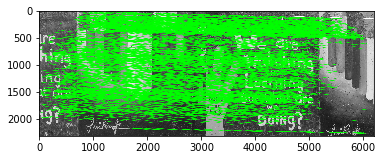

homography bewteen 4 and 5:
[[  8.55807033e-01   3.63019886e-02   1.75003642e+03]
 [  3.98433421e-02   8.69091704e-01  -1.89773883e+02]
 [  8.37570225e-06   1.68922629e-05   1.00000000e+00]]


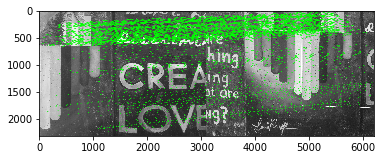

In [17]:
for i in range(1,5):
    print('homography bewteen %d and %d:' % (i, i+1))
    tempCompare = [images[i], images[i - 1]] 
    
    sift = cv2.xfeatures2d.SIFT_create()
    
    kp1, des1 = sift.detectAndCompute(tempCompare[0], None)
    kp2, des2 = sift.detectAndCompute(tempCompare[1], None)
    
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
            
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = tempCompare[0].shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        tempCompare[1] = cv2.polylines(tempCompare[1],[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None
        
    print(M)
    
    H.append(M)
    
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    
    img3 = cv2.drawMatches(tempCompare[0],kp1,tempCompare[1],kp2,good,None,**draw_params)
    
    plt.imshow(img3, 'gray'),plt.show()
    
    cv2.imwrite('match\\match_%d_%d.jpg'% (i, i + 1), img3)

In [18]:
H

[array([[  8.63545462e-01,   1.74127290e-02,   1.91503461e+03],
        [  3.87112731e-02,   9.08889209e-01,   1.22118079e+02],
        [  1.16591937e-05,   6.36985439e-07,   1.00000000e+00]]),
 array([[  8.86447186e-01,  -6.45127959e-02,   2.07802812e+03],
        [  3.61292903e-02,   9.29398902e-01,   3.06793156e+02],
        [  4.37483770e-07,  -2.05032592e-05,   1.00000000e+00]]),
 array([[  1.01384519e+00,  -2.59172802e-03,   1.40576118e+03],
        [  3.00598173e-02,   1.01291516e+00,   9.24798447e+01],
        [  1.93088126e-05,   2.30176010e-06,   1.00000000e+00]]),
 array([[  8.55807033e-01,   3.63019886e-02,   1.75003642e+03],
        [  3.98433421e-02,   8.69091704e-01,  -1.89773883e+02],
        [  8.37570225e-06,   1.68922629e-05,   1.00000000e+00]])]

In [19]:
#dirName = 'Homographies2\\'
dirName = 'Homographies1\\'

In [20]:
np.savetxt(dirName+'H12.txt', H[0])
np.savetxt(dirName+'H23.txt', H[1])
np.savetxt(dirName+'H34.txt', H[2])
np.savetxt(dirName+'H45.txt', H[3])

In [21]:
H12 = np.loadtxt(dirName + 'H12.txt')
H23 = np.loadtxt(dirName + 'H23.txt')
H34 = np.loadtxt(dirName + 'H34.txt')
H45 = np.loadtxt(dirName + 'H45.txt')
H = [H12, H23, H34, H45]

In [22]:
H

[array([[  8.63545462e-01,   1.74127290e-02,   1.91503461e+03],
        [  3.87112731e-02,   9.08889209e-01,   1.22118079e+02],
        [  1.16591937e-05,   6.36985439e-07,   1.00000000e+00]]),
 array([[  8.86447186e-01,  -6.45127959e-02,   2.07802812e+03],
        [  3.61292903e-02,   9.29398902e-01,   3.06793156e+02],
        [  4.37483770e-07,  -2.05032592e-05,   1.00000000e+00]]),
 array([[  1.01384519e+00,  -2.59172802e-03,   1.40576118e+03],
        [  3.00598173e-02,   1.01291516e+00,   9.24798447e+01],
        [  1.93088126e-05,   2.30176010e-06,   1.00000000e+00]]),
 array([[  8.55807033e-01,   3.63019886e-02,   1.75003642e+03],
        [  3.98433421e-02,   8.69091704e-01,  -1.89773883e+02],
        [  8.37570225e-06,   1.68922629e-05,   1.00000000e+00]])]

## warp images

In [23]:
targetSize = (7500,3000)
#targetSize = (6000,2500)

In [24]:
Hto1 = [np.eye(3)]
for i in range(4):
    Hto1.append(Hto1[i].dot(H[i]))

In [25]:
Hto1

[array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]),
 array([[  8.63545462e-01,   1.74127290e-02,   1.91503461e+03],
        [  3.87112731e-02,   9.08889209e-01,   1.22118079e+02],
        [  1.16591937e-05,   6.36985439e-07,   1.00000000e+00]]),
 array([[  7.66954352e-01,  -7.87908118e-02,   3.71484847e+03],
        [  6.72064459e-02,   8.39719442e-01,   4.81402182e+02],
        [  1.07957570e-05,  -2.06634128e-05,   1.02442356e+00]]),
 array([[  8.46933855e-01,  -7.32454547e-02,   4.78571656e+03],
        [  1.02674049e-01,   8.51498442e-01,   6.53535519e+02],
        [  3.01044904e-05,  -1.86002864e-05,   1.03768886e+00]]),
 array([[  7.61977343e-01,   4.79299487e-02,   6.28178173e+03],
        [  1.27269536e-01,   7.54797198e-01,   6.71626679e+02],
        [  3.37139099e-05,   2.45641135e-06,   1.09390267e+00]])]

In [26]:
imageNames = glob.glob('undis1/*.jpg')
#imageNames = glob.glob('undis2/*.jpg')
images = [cv2.imread(imageName) for imageName in imageNames]
warppedImages = []

In [39]:
for i in range(5):
    temp = cv2.warpPerspective(images[i], Hto1[i], targetSize)
    warppedImages.append(temp)
    cv2.imwrite('warpped\\warpped%d.jpg' % (i+1), temp)
    #cv2.imwrite('warpped2\\warpped%d.jpg' % (i+1), temp)

## stitch images

In [40]:
result = np.zeros((targetSize[1],targetSize[0],3), np.uint8)

In [41]:
warppedImages[0][0,0]

array([151, 112,  90], dtype=uint8)

In [42]:
for i in range(int(targetSize[1] / 500)):
    for j in range(int(targetSize[0] / 500)):
        for ii in range(500):
            for jj in range(500):
                x = i * 500 + ii
                y = j * 500 + jj
                mark = []
                for k in range(5):
                    if warppedImages[k][x,y,0] != 0 or warppedImages[k][x,y,1] != 0 or warppedImages[k][x,y,2] != 0:
                        result[x,y] = warppedImages[k][x,y]
                        mark.append(k)
                if len(mark) == 2:
                    r1 =  warppedImages[mark[0]][x,y,0]
                    g1 =  warppedImages[mark[0]][x,y,1]
                    b1 =  warppedImages[mark[0]][x,y,2]
                    r2 =  warppedImages[mark[1]][x,y,0]
                    g2 =  warppedImages[mark[1]][x,y,1]
                    b2 =  warppedImages[mark[1]][x,y,2]
                    
                    if r1 > r2:
                        r = r2 + (r1 - r2) / 2
                    else:
                        r = r1 + (r2 - r1) / 2
                        
                    if g1 > g2:
                        g = g2 + (g1 - g2) / 2
                    else:
                        g = g1 + (g2 - g1) / 2
                        
                    if b1 > b2:
                        b = b2 + (b1 - b2) / 2
                    else:
                        b = b1 + (b2 - b1) / 2
                        
                    result[x,y] = np.asarray([r,g,b])
        cv2.imwrite('result.jpg',result)
        #cv2.imwrite('result2.jpg',result)